## **Strategies Results**
---
Distances between the original histograms and the histograms generated by each strategy.

##### 🏁 **Libraries and Dependencies**

In [1]:
%pip -q install matplotlib
%pip -q install pandas
%pip -q install numpy
%pip -q install pyyaml

In [1]:
from IPython.display import display
from utils import StrategiesInfo

#### ⚙️ **Datasets Normalization**

In [3]:
clonegen = StrategiesInfo.getInfo("clonegen", "perc")
ollvm = StrategiesInfo.getInfo("ollvm", "perc")
opt = StrategiesInfo.getInfo("opt", "perc")

#### 📊 **Distances between the programs of all classes**
Calculating the distance between optimized/obfuscated and original programs.

##### Get distances

In [4]:
ollvmDists = StrategiesInfo.getDistances(ollvm, opt["OJCloneO0"])
clonegenDists = StrategiesInfo.getDistances(clonegen, opt["OJCloneO0"])
optDists = StrategiesInfo.getDistances({"OJCloneO3": opt["OJCloneO3"]}, opt["OJCloneO0"])
dists = dict(ollvmDists, **clonegenDists)
dists.update(optDists)

In [5]:
for key in dists:
    print("Sum of distances between the {} programs to original programs: {}".format(key, sum(dists[key])))

Sum of distances between the OLLVMO0 programs to original programs: 14138.319800393889
Sum of distances between the BCFO0 programs to original programs: 8744.46586153184
Sum of distances between the FLAO0 programs to original programs: 7187.447431306773
Sum of distances between the SUBO0 programs to original programs: 5884.668039607432
Sum of distances between the DRLSGO0 programs to original programs: 1068.4969666331654
Sum of distances between the MCMCO0 programs to original programs: 3019.6208835648963
Sum of distances between the RSO0 programs to original programs: 3190.974471122758
Sum of distances between the OJCloneO3 programs to original programs: 14811.096244308157


##### Chart with distances

Figure 9:

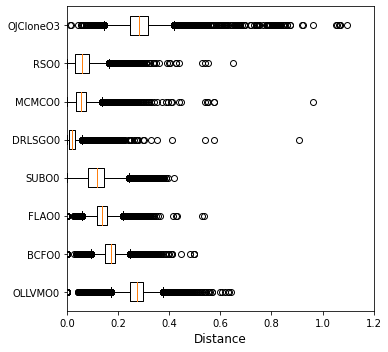

In [6]:
fig, ax = StrategiesInfo.plotDistances(dists)

In [7]:
for key in dists:
    out = StrategiesInfo.countOutliers(dists[key])
    print(f"Number of outliers of {key}: {out.sum()}")

Number of outliers of OLLVMO0: 1631
Number of outliers of BCFO0: 2466
Number of outliers of FLAO0: 2089
Number of outliers of SUBO0: 305
Number of outliers of DRLSGO0: 1035
Number of outliers of MCMCO0: 1141
Number of outliers of RSO0: 634
Number of outliers of OJCloneO3: 1353


#### 🕵️‍♀️ **Trying to discover the Obfuscator**

Figure 13:

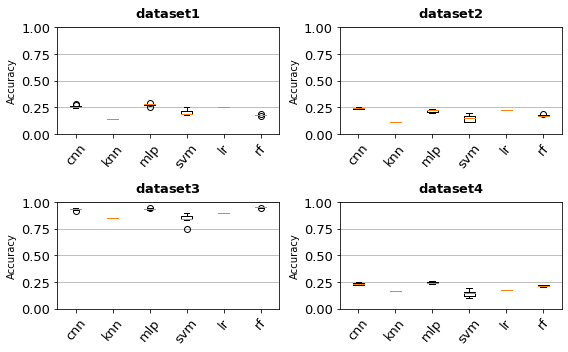

In [2]:
fig, data = StrategiesInfo.plotDiscover()